## 2. Введение в проектирование экспериментов

<p style="background: aquamarine;  text-align: left; padding: 10px">
<b>Машинное обучение (ML)</b> — это область компьютерных наук, которая использует алгоритмы для создания и обучения моделей для выполнения рутинных задач. 

Мир постоянно развивается, стимулируемый прорывными технологиями, что приводит к постоянному увеличению объёма данных. Следовательно, данные, которые инженеры машинного обучения должны обрабатывать для обучения моделей, также постоянно меняются. Обученная модель может удовлетворить непосредственные потребности заказчика только на основе данных, которые ей были предоставлены, но в долгосрочной перспективе она может оказаться неэффективной, поскольку она не приспосабливается автоматически к изменениям в наборах данных. 

Обновления в фиксированных наборах данных, используемых для обучения, приводят к изменениям в модели, что снижает её точность.

<p style="background: aquamarine;  text-align: left; padding: 10px">
<b>Точность модели</b> (accuracy) машинного обучения определяется как процент правильных прогнозов для тестовых данных и рассчитывается путём деления количества правильных прогнозов на общее количество прогнозов. Обычно это определяющий фактор при оценке успеха проекта машинного обучения — чем выше точность, тем лучше работает модель машинного обучения.

Например, вы оцениваете спрос на товар. Ваша цель — узнать, купит ли клиент продукт. Вы строите модель на основе данных и реальных ответов, а затем сравниваете свои предсказания и реальные ответы. Если предсказания совпадают с реальными ответами чаще, чем в 90 % случаях, то обычно говорят, что модель надёжна, и её можно использовать для предсказаний спроса уже других клиентов.

<center><b>КАК ДОБИТЬСЯ ЛУЧШЕЙ ТОЧНОСТИ МОДЕЛИ ML?

Чтобы оптимизировать метрики для тестовых данных, необходимо пространство для многочисленных экспериментов. Экспериментирование с различными архитектурами моделей, кодом предварительной обработки и параметрами модели, определяющими успех процесса обучения, несколько раз приводит к повторному обучению модели. 

Возникает необходимость отслеживания экспериментов, то есть сохранения всей важной информации, связанной с каждым запускаемым экспериментом, например сохранение параметров запуска, влияющих на производительность модели. Выполнять эту задачу вручную обременительно, поэтому имеет смысл поставить для процесса автоматизированную инфраструктуру — **пайплайн** (pipeline) машинного обучения.

<p style="background: aquamarine;  text-align: left; padding: 10px">
<b>Пайплайном</b> (pipeline) в ML называется способ систематизации и автоматизации рабочего процесса, необходимого для создания модели машинного обучения. Пайплайны состоят из нескольких последовательных шагов, которые выполняют всё — от извлечения и предварительной обработки данных до обучения и проверки моделей.

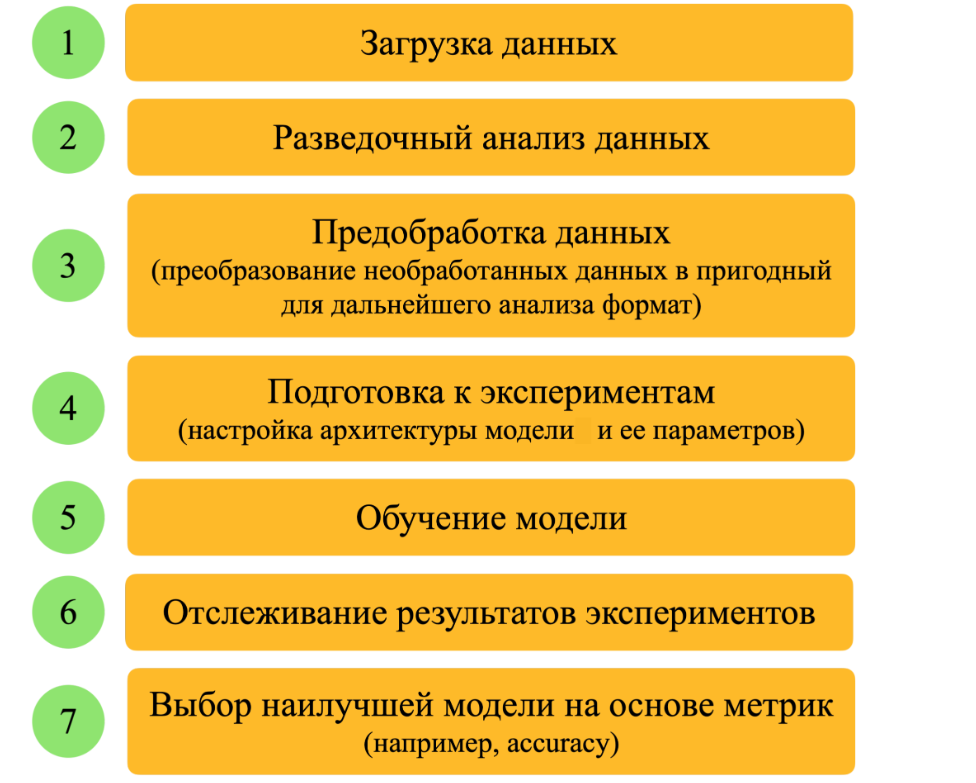

 <p style="background: #E1DEDE; border:1px black  solid; text-align: left; padding: 10px">
Этот рабочий процесс позволяет осуществлять <b>непрерывную настройку существующих моделей наряду с постоянной оценкой производительности</b>. Самым большим преимуществом этого процесса является то, что его можно автоматизировать с помощью доступных инструментов.

✍️ Давайте на примере подробно разберём проектирование экспериментов и построение пайплайна. 

<center><p style="border:4px aquamarine  dotted;  width:800px; text-align: center; padding: 10px">
Представьте, что вы специалист по данным, а ваша компания сотрудничает с медицинскими учреждениями. Перед вами стоит задача выяснить, почему люди, получившие инструкции по лечению, не приходят на следующий приём. В качестве набора данных вы используете информацию о посещениях и характеристики пациентов. 

Каждая история болезни характеризуется следующими признаками:

- No_show — пациент не пришёл на приём;
- Gender — пол пациента;
- ScheduledDay — день, когда планируется встреча;
- AppointmentDay — реальная дата встречи;
- Age — возраст пациента;
- Neighbourhood — район проживания каждого пациента;
- Scholarship — получает ли пациент стипендию;
- …и несколько других признаков.

1. Первым этапом данных является загрузка данных: 

In [6]:
import pandas as pd
#df = pd.read_csv('./KaggleV2-May-2016.csv')
df = pd.read_csv('data/KaggleV2-May-2016.csv')

Основная цель проекта — выделить факторы, способствующие пропуску встреч с врачом. Однако это долгосрочная цель. Прежде чем копнуть глубже, необходимо попытаться ответить на следующие вопросы:

- Каково соотношение людей, которые пропускают встречи, к тем, кто этого не делает?
- Кто не появляется чаще — мужчины или женщины?

2. Для ответа на эти и другие подобные вопросы используется EDA

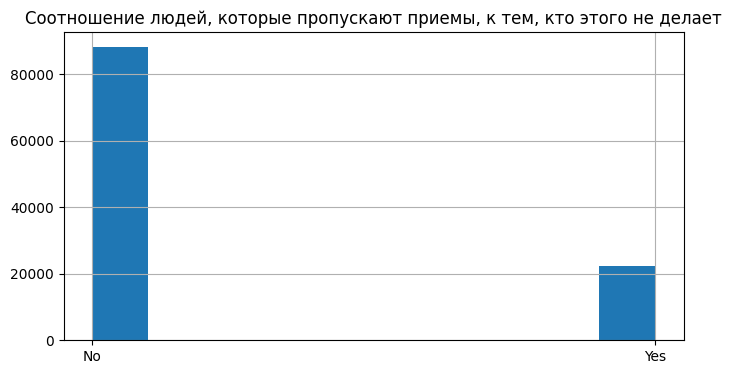

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4))
df['No-show'].hist()
plt.title('Соотношение людей, которые пропускают приемы, к тем, кто этого не делает');

In [10]:
df['No-show'].value_counts(True)

No     0.798067
Yes    0.201933
Name: No-show, dtype: float64

Данный метод также может помочь оценить, кто не появляется чаще — мужчины или женщины:

In [11]:
df[df['No-show']=='Yes']['Gender'].value_counts(True)

F    0.653882
M    0.346118
Name: Gender, dtype: float64

Итак, мы видим, что людей, пропускающих приём, примерно 20 %.

3. После того, как выполнен разведывательный анализ данных, переходим к предобработке данных. Некоторые столбцы, например ‘Gender’ и ‘Neighbourhood’, представлены в текстовом виде, а модели машинного обучения работают с числовыми признаками. Необходимо закодировать такие данные. Для **one-hot кодировки** можно воспользоваться методом **get_dummies()** библиотеки *pandas*:

In [12]:
categorical_columns_names = ['Gender', 'Neighbourhood']
encoded_columns = pd.get_dummies(df, columns = categorical_columns_names)

4. После этих этапов можно переходить к созданию предсказания, придёт ли пациент на приём, обучению и оптимизации модели, а также выделению наиболее важных признаков, способствующих высокой производительности модели

##  3. Логирование экспериментов

 <p style="background: #ffc7c7; border:1px black  solid; text-align: left; padding: 10px">
Сравнение результатов ML-экспериментов становится весьма затруднительным процессом, потому что необходимо иметь записи всех проводимых ранее экспериментов. Например, если во время EDA-задачи предсказания спроса на лекарство изменяются данные, то каждый раз выводить на экран новую визуализацию неудобно. 

Логирование решает эту проблему! Даже если информация изменится с запуском нового эксперимента, всё будет зафиксировано в логе. 

<p style="background: aquamarine;  text-align: left; padding: 10px">
<b>Лог (log)</b> — это специальный журнал, в котором хранится информация о состоянии работы программы. Логирование (ведение журнала) обеспечивает отслеживание событий, происходящих во время работы программы, и может выводить эти события в отдельный файл, чтобы вы могли отслеживать, что происходит во время выполнения кода. 

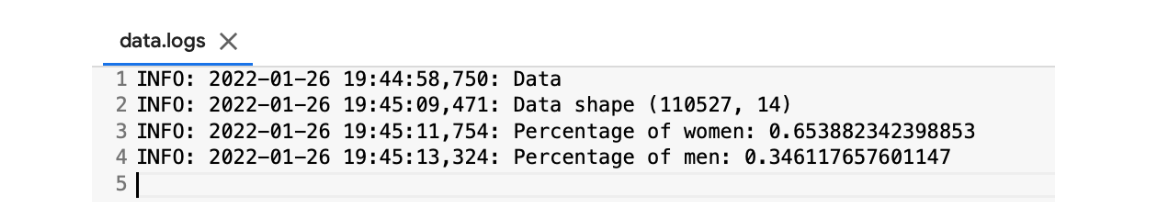

Здесь зафиксирована информация о форме данных и соотношение классов целевой переменной Gender. Это даёт возможность отлаживать код.

Для логирования в Python используется модуль **logging**. Он используется большинством сторонних библиотек Python, поэтому вы можете интегрировать свои логи с сообщениями из этих библиотек для создания единого журнала логов приложения. Данный модуль импортируется как другие библиотеки:

In [13]:
import logging

Прежде чем приступить к логированию, необходимо установить базовые настройки:

- уровень;
- обработчик (хендлер);
- формат логирования. 

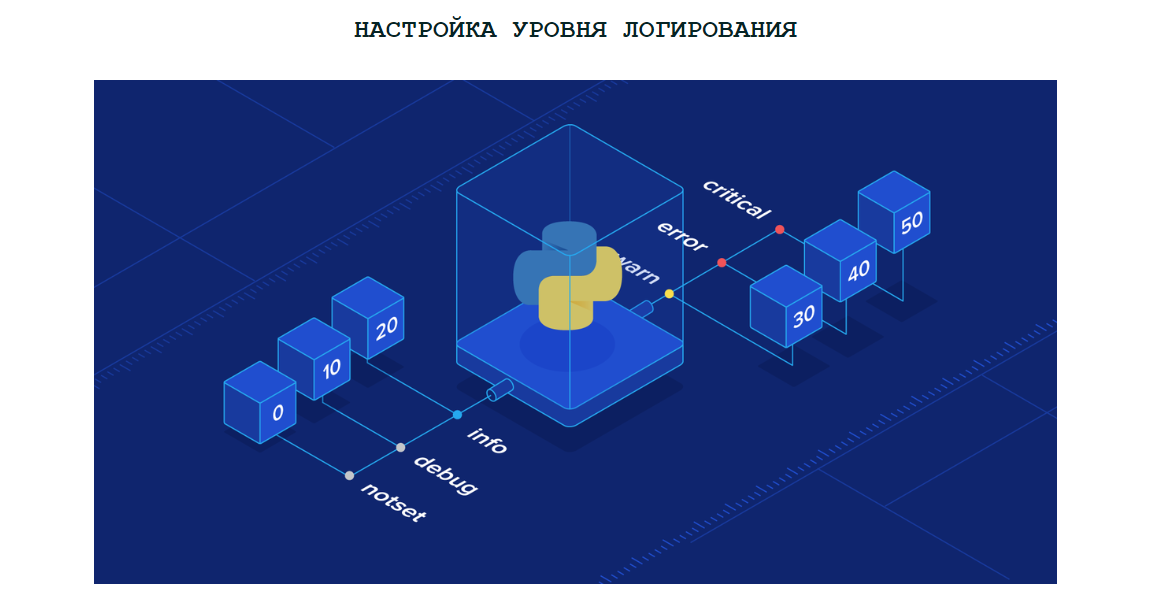

С импортированным модулем **logging** вы можете использовать так называемый **«logger»** для логирования сообщений, которые вы хотите видеть

По умолчанию существует пять стандартных уровней логирования, указывающих на важность событий: 

- отладка;
- информация;
- предупреждение;
- ошибка;
- критический. 

Самый низкий уровень из данных — не установлен, а самый высокий уровень является критическим. Установив уровень логирования, можно записать сообщение специально для этого уровня в определённый файл журнала. Возле сообщения будет указан его уровень.

In [14]:
import logging
logging.debug('This is a debug message')
logging.info('This is an informational message')
logging.warning('This message is a warning')
logging.error('This is an error message')
logging.critical('This is a critical message')

ERROR:root:This is an error message
CRITICAL:root:This is a critical message


Здесь мы дали команду залогировать пять сообщений. Вывод команд показывает уровень важности перед каждым сообщением (WARNING/ERROR/CRITICAL). **root** — имя логгера по умолчанию.

Этот формат, который показывает уровень, имя и сообщение, разделенные двоеточием (:), является форматом вывода по умолчанию. Его можно изменить для включения таких вещей, как отметка времени, номер строки и других деталей. Мы научимся делать это чуть ниже.

Обратите внимание, что сообщения **debug()** и **info()** не были отображены. Это связано с тем, что по умолчанию модуль ведения журнала регистрирует сообщения только с уровнем ПРЕДУПРЕЖДЕНИЕ (WARNING) или выше. Вы можете изменить это, сконфигурировав модуль logging для регистрации событий всех уровней, то есть установив уровень на **ОТЛАДКУ (DEBUG)**. 

Чтобы сделать это, нужно сначала сбросить настройки библиотеки *logging*, перезапустив наш ноутбук. В VS Code это делается с помощью кнопки перезапуска:

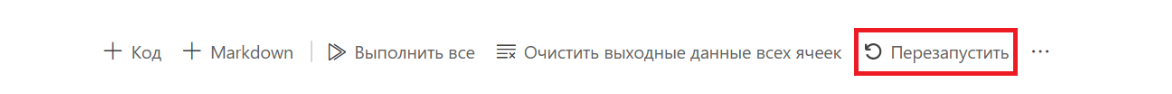

Другой вариант сбросить настройки *logging* — воспользоваться функцией **reload()** из вспомогательной системной библиотеки *importlib*:

In [15]:
from importlib import reload
import logging
reload(logging)

<module 'logging' from 'c:\\Users\\User\\AppData\\Local\\Programs\\Python\\Python39\\lib\\logging\\__init__.py'>

Далее, когда настройки логирования сброшены, нам необходимо перед выводом сообщений, сразу после импорта, изменить конфигурацию логгера.

In [16]:
logging.basicConfig(level=logging.DEBUG)

Мы настроили уровень ведения журнала DEBUG. Это означает, что теперь будут отслеживаться только сообщения этого уровня (DEBUG) и выше. В результате выполнения кода логирования мы должны получить следующие сообщения:

In [17]:
import logging
logging.debug('This is a debug message')
logging.info('This is an informational message')
logging.warning('This message is a warning')
logging.error('This is an error message')
logging.critical('This is a critical message')

DEBUG:root:This is a debug message
INFO:root:This is an informational message
ERROR:root:This is an error message
CRITICAL:root:This is a critical message


Однако, как вы понимаете, логирование в консоль ничем не лучше простого вывода сообщений с помощью функции **print()**. Обычно логирование производится в специальные лог-файлы, для этого используются **обработчики (хендлеры) логов**. Давайте рассмотрим пример логирования в файл.

<center><b>УСТАНОВКА ОБРАБОТЧИКА ЛОГИРОВАНИЯ

<p style="background: aquamarine;  text-align: left; padding: 10px">
Функция <b>обработчиков ведения журналов</b> состоит в том, чтобы отображать записи/сообщения журнала на любом выходе, который вы выберете. То есть вы можете выбрать, отображать ли ваш лог в виде файла, HTTP-страницы или даже отправить лог на электронную почту через SMTP. 

Более того, у созданного вами *logger* может быть несколько обработчиков, а это значит, что вы можете настроить его на сохранение в файл журнала, а также на отправку по *email* одновременно. Подробнее ознакомиться с видами хендлеров можно [здесь](https://digitology.tech/docs/python_3/library/logging.handlers.html).

Обработчики являются классами модуля *logging*. Нам понадобится обработчик *FileHandler*, который возьмёт запись/сообщение журнала и добавит его в файл журнала *log_file.log*:

In [18]:
logging.FileHandler('log_file.log')

<FileHandler C:\Курс DS-3.0\IDE\EDA\log_file.log (NOTSET)>

<center><b>УСТАНОВКА ФОРМАТА ЛОГИРОВАНИЯ

Как мы уже сказали, типичный формат лога выглядит так: *уровень: имя: сообщение*. Однако его можно изменить.

In [19]:
from importlib import reload
import logging
reload(logging)
 
logging.basicConfig(
    format="%(levelname)s: %(asctime)s: %(message)s",
    level=logging.DEBUG
)
logging.info('Check')

INFO: 2023-04-28 17:22:17,142: Check


Здесь формат записей журнала включает дату, время, уровень ведения журнала и само сообщение.

Таким образом, вы можете изменять как формат лога, так и формат вывода. Добавление времени сообщения существенно облегчает работу — становится легко отследить, когда было получено сообщение.

Создадим функцию **get_logger()** для генерации лог-файла и записи в него информации.

In [20]:
import os.path

# Функция для создания лог-файла и записи в него информации
def get_logger(path, file):
  """[Создает лог-файл для логирования в него]
  Аргументы:
      path {string} -- путь к директории
      file {string} -- имя файла
   Возвращает:
      [obj] -- [логер]
  """
  # проверяем, существует ли файл
  log_file = os.path.join(path, file)
 
  #если  файла нет, создаем его
  if not os.path.isfile(log_file):
      open(log_file, "w+").close()
  
  # поменяем формат логирования
  file_logging_format = "%(levelname)s: %(asctime)s: %(message)s"
  
  # конфигурируем лог-файл
  logging.basicConfig(level=logging.INFO, 
  format = file_logging_format)
  logger = logging.getLogger()
  
  # создадим хэнлдер для записи лога в файл
  handler = logging.FileHandler(log_file)
  
  # установим уровень логирования
  handler.setLevel(logging.INFO)
  
  # создадим формат логирования, используя file_logging_format
  formatter = logging.Formatter(file_logging_format)
  handler.setFormatter(formatter)
  
  # добавим хэндлер лог-файлу
  logger.addHandler(handler)
  return logger

Итак, *get_logger* принимает на вход папку, в которой вы хотите хранить файл лога и имя файла. Функция нацелена на создание информационных сообщений и записи их в лог-файл. 

Для удобства лог-файлы хранят в отдельной директории. Новую папку можно создать с помощью команды *mkdir*:

In [21]:
!mkdir logs

Создадим лог-файл и запишем туда информацию о датасете.

In [22]:
# создаем лог-файл
logger = get_logger(path="logs/", file="data.logs")

logger.info("Data")

logger.info("Data shape {}".format(df.shape))

logger.info("Percentage of women: {}".format(df[df['No-show']=='Yes']['Gender'].value_counts(True)[0]))

logger.info("Percentage of men: {}".format(df[df['No-show']=='Yes']['Gender'].value_counts(True)[1]))

INFO: 2023-04-28 17:33:31,542: Data
INFO: 2023-04-28 17:33:31,568: Data shape (110527, 14)
INFO: 2023-04-28 17:33:31,806: Percentage of women: 0.653882342398853
INFO: 2023-04-28 17:33:31,880: Percentage of men: 0.346117657601147


⭐️ Отлично! Мы зафиксировали информацию о датасете в лог-файл. Такой файл отражает сведения о том, что всё работает в штатном режиме (то есть просто ежедневный мониторинг программы) или что произошла какая-то ошибка, на которую нужно максимально срочно отреагировать и устранить. Например, мы можем проверять форму данных, и, если форма не соответствует необходимой, логировать ошибку:

In [23]:
if df.shape != (110526,14):
 logger.error('Data shape is incorrect!')

ERROR: 2023-04-28 17:36:06,072: Data shape is incorrect!


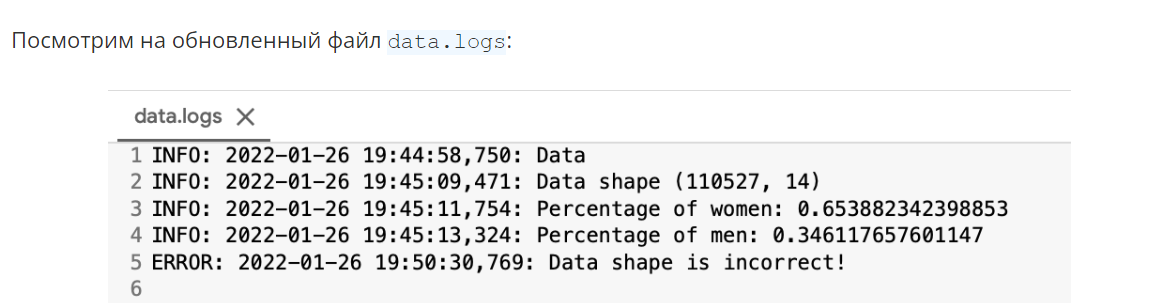

Обработчиков ведения журналов (хендлеры [StreamHandler](https://docs.python.org/3/library/logging.handlers.html#logging.StreamHandler), [FileHandler](https://docs.python.org/3/library/logging.handlers.html#logging.FileHandler), [HTTPHandler](https://docs.python.org/3/library/logging.handlers.html#logging.handlers.HTTPHandler)) с форматом выхода логирования.

## 4. Знакомство с Comet.ml

 <p style="background: #E1DEDE; border:1px black  solid; text-align: left; padding: 10px">
→ Comet.ml — это онлайн-платформа, позволяющая отслеживать эксперименты. Основное преимущество Comet состоит в том, что с её помощью можно легко построить панель отчётности и систему мониторинга.

Comet предоставляет следующие возможности:

- сравнивать эксперименты с точки зрения метрик, параметров и так далее;
- следить за моделью от создания до вывода в продакшен;
- делиться своим проектом с другими людьми, которые в режиме реального времени будут следить за результатами;
- строить отчёты исходя из результатов эксперимента;
- оставить проект приватным или сделать его общедоступным.

Для начала работы с платформой [Comet.ml](https://www.comet.com/site/) необходимо зарегистрировать бесплатную учётную запись. После этого вы сможете создавать как публичные, так и приватные проекты. 

In [24]:
# import comet_ml at the top of your file
from comet_ml import Experiment

# Create an experiment with your api key
experiment = Experiment(
    api_key="QQV3zRwo9uZPEEWcG6X3SWkBQ",
    project_name="medical-appointment",
    workspace="electmg",
)

DEBUG: 2023-04-29 12:40:06,078: No INI file found: []
DEBUG: 2023-04-29 12:40:06,080: No INI file found: ['./.comet.config']
DEBUG: 2023-04-29 12:40:06,082: No INI file found: ['/content/drive/MyDrive/.comet.config']
DEBUG: 2023-04-29 12:40:06,084: No INI file found: ['~/.comet.config']
DEBUG: 2023-04-29 12:40:06,086: Looking up key: disable_auto_logging, namespace: ['comet']
DEBUG: 2023-04-29 12:40:06,088: Searching <ConfigOSEnv> for COMET_DISABLE_AUTO_LOGGING
DEBUG: 2023-04-29 12:40:06,090: Searching <ConfigEnvFileEnv: None> for COMET_DISABLE_AUTO_LOGGING
DEBUG: 2023-04-29 12:40:06,092: Searching <ConfigDictEnv: {}> for COMET_DISABLE_AUTO_LOGGING
DEBUG: 2023-04-29 12:40:06,094: Found nothing--returning NO_VALUE
DEBUG: 2023-04-29 12:40:06,108: No INI file found: []
DEBUG: 2023-04-29 12:40:06,112: No INI file found: ['./.comet.config']
DEBUG: 2023-04-29 12:40:06,120: No INI file found: ['/content/drive/MyDrive/.comet.config']
DEBUG: 2023-04-29 12:40:06,124: No INI file found: ['~/.come

DEBUG: 2023-04-29 12:40:06,620: Looking up key: disable_auto_logging, namespace: ['comet']
DEBUG: 2023-04-29 12:40:06,622: Searching <ConfigOSEnv> for COMET_DISABLE_AUTO_LOGGING
DEBUG: 2023-04-29 12:40:06,626: Searching <ConfigEnvFileEnv: None> for COMET_DISABLE_AUTO_LOGGING
DEBUG: 2023-04-29 12:40:06,628: Searching <ConfigDictEnv: {}> for COMET_DISABLE_AUTO_LOGGING
DEBUG: 2023-04-29 12:40:06,628: Found nothing--returning NO_VALUE
DEBUG: 2023-04-29 12:40:06,634: No INI file found: []
DEBUG: 2023-04-29 12:40:06,636: No INI file found: ['./.comet.config']
DEBUG: 2023-04-29 12:40:06,638: No INI file found: ['/content/drive/MyDrive/.comet.config']
DEBUG: 2023-04-29 12:40:06,642: No INI file found: ['~/.comet.config']
DEBUG: 2023-04-29 12:40:06,644: Looking up key: disable_auto_logging, namespace: ['comet']
DEBUG: 2023-04-29 12:40:06,646: Searching <ConfigOSEnv> for COMET_DISABLE_AUTO_LOGGING
DEBUG: 2023-04-29 12:40:06,648: Searching <ConfigEnvFileEnv: None> for COMET_DISABLE_AUTO_LOGGING
D

DEBUG: 2023-04-29 12:40:06,998: Searching <ConfigDictEnv: {}> for COMET_DISABLE_AUTO_LOGGING
DEBUG: 2023-04-29 12:40:07,000: Found nothing--returning NO_VALUE
DEBUG: 2023-04-29 12:40:07,004: No INI file found: []
DEBUG: 2023-04-29 12:40:07,014: No INI file found: ['./.comet.config']
DEBUG: 2023-04-29 12:40:07,016: No INI file found: ['/content/drive/MyDrive/.comet.config']
DEBUG: 2023-04-29 12:40:07,020: No INI file found: ['~/.comet.config']
DEBUG: 2023-04-29 12:40:07,022: Looking up key: disable_auto_logging, namespace: ['comet']
DEBUG: 2023-04-29 12:40:07,024: Searching <ConfigOSEnv> for COMET_DISABLE_AUTO_LOGGING
DEBUG: 2023-04-29 12:40:07,028: Searching <ConfigEnvFileEnv: None> for COMET_DISABLE_AUTO_LOGGING
DEBUG: 2023-04-29 12:40:07,030: Searching <ConfigDictEnv: {}> for COMET_DISABLE_AUTO_LOGGING
DEBUG: 2023-04-29 12:40:07,032: Found nothing--returning NO_VALUE
DEBUG: 2023-04-29 12:40:07,034: No INI file found: []
DEBUG: 2023-04-29 12:40:07,036: No INI file found: ['./.comet.co

DEBUG: 2023-04-29 12:40:07,285: No INI file found: ['/content/drive/MyDrive/.comet.config']
DEBUG: 2023-04-29 12:40:07,287: No INI file found: ['~/.comet.config']
DEBUG: 2023-04-29 12:40:07,291: Looking up key: disable_auto_logging, namespace: ['comet']
DEBUG: 2023-04-29 12:40:07,293: Searching <ConfigOSEnv> for COMET_DISABLE_AUTO_LOGGING
DEBUG: 2023-04-29 12:40:07,295: Searching <ConfigEnvFileEnv: None> for COMET_DISABLE_AUTO_LOGGING
DEBUG: 2023-04-29 12:40:07,297: Searching <ConfigDictEnv: {}> for COMET_DISABLE_AUTO_LOGGING
DEBUG: 2023-04-29 12:40:07,299: Found nothing--returning NO_VALUE
DEBUG: 2023-04-29 12:40:07,301: No INI file found: []
DEBUG: 2023-04-29 12:40:07,303: No INI file found: ['./.comet.config']
DEBUG: 2023-04-29 12:40:07,307: No INI file found: ['/content/drive/MyDrive/.comet.config']
DEBUG: 2023-04-29 12:40:07,309: No INI file found: ['~/.comet.config']
DEBUG: 2023-04-29 12:40:07,311: Looking up key: console, namespace: ['comet', 'logging']
DEBUG: 2023-04-29 12:40:0

DEBUG: 2023-04-29 12:40:07,553: Searching <ConfigOSEnv> for COMET_AUTO_LOG_GIT_METADATA
DEBUG: 2023-04-29 12:40:07,561: Searching <ConfigEnvFileEnv: None> for COMET_AUTO_LOG_GIT_METADATA
DEBUG: 2023-04-29 12:40:07,565: Searching <ConfigDictEnv: {}> for COMET_AUTO_LOG_GIT_METADATA
DEBUG: 2023-04-29 12:40:07,569: Found nothing--returning NO_VALUE
DEBUG: 2023-04-29 12:40:07,571: Looking up key: git_patch, namespace: ['comet', 'auto_log']
DEBUG: 2023-04-29 12:40:07,579: Searching <ConfigOSEnv> for COMET_AUTO_LOG_GIT_PATCH
DEBUG: 2023-04-29 12:40:07,581: Searching <ConfigEnvFileEnv: None> for COMET_AUTO_LOG_GIT_PATCH
DEBUG: 2023-04-29 12:40:07,583: Searching <ConfigDictEnv: {}> for COMET_AUTO_LOG_GIT_PATCH
DEBUG: 2023-04-29 12:40:07,585: Found nothing--returning NO_VALUE
DEBUG: 2023-04-29 12:40:07,593: Looking up key: disable, namespace: ['comet', 'auto_log']
DEBUG: 2023-04-29 12:40:07,599: Searching <ConfigOSEnv> for COMET_AUTO_LOG_DISABLE
DEBUG: 2023-04-29 12:40:07,601: Searching <ConfigE

DEBUG: 2023-04-29 12:40:07,793: Found nothing--returning NO_VALUE
DEBUG: 2023-04-29 12:40:07,795: Looking up key: experiment_key, namespace: ['comet']
DEBUG: 2023-04-29 12:40:07,797: Searching <ConfigOSEnv> for COMET_EXPERIMENT_KEY
DEBUG: 2023-04-29 12:40:07,801: Searching <ConfigEnvFileEnv: None> for COMET_EXPERIMENT_KEY
DEBUG: 2023-04-29 12:40:07,803: Searching <ConfigDictEnv: {}> for COMET_EXPERIMENT_KEY
DEBUG: 2023-04-29 12:40:07,807: Found nothing--returning NO_VALUE
COMET WARNING: As you are running in a Jupyter environment, you will need to call `experiment.end()` when finished to ensure all metrics and code are logged before exiting.
DEBUG: 2023-04-29 12:40:07,813: Looking up key: check_tls_certificate, namespace: ['comet', 'internal']
DEBUG: 2023-04-29 12:40:07,815: Searching <ConfigOSEnv> for COMET_INTERNAL_CHECK_TLS_CERTIFICATE
DEBUG: 2023-04-29 12:40:07,821: Searching <ConfigEnvFileEnv: None> for COMET_INTERNAL_CHECK_TLS_CERTIFICATE
DEBUG: 2023-04-29 12:40:07,825: Searching

DEBUG: 2023-04-29 12:40:08,371: Searching <ConfigDictEnv: {}> for COMET_ALLOW_HEADER_VALUE
DEBUG: 2023-04-29 12:40:08,373: Found nothing--returning NO_VALUE
DEBUG: 2023-04-29 12:40:08,377: Looking up key: rest_v2_minimal_backend_version, namespace: ['comet']
DEBUG: 2023-04-29 12:40:08,379: Searching <ConfigOSEnv> for COMET_REST_V2_MINIMAL_BACKEND_VERSION
DEBUG: 2023-04-29 12:40:08,393: Searching <ConfigEnvFileEnv: None> for COMET_REST_V2_MINIMAL_BACKEND_VERSION
DEBUG: 2023-04-29 12:40:08,395: Searching <ConfigDictEnv: {}> for COMET_REST_V2_MINIMAL_BACKEND_VERSION
DEBUG: 2023-04-29 12:40:08,395: Found nothing--returning NO_VALUE
DEBUG: 2023-04-29 12:40:08,409: Starting new HTTPS connection (1): www.comet.com:443
DEBUG: 2023-04-29 12:40:09,144: https://www.comet.com:443 "GET /clientlib/isAlive/ver HTTP/1.1" 200 81
DEBUG: 2023-04-29 12:40:09,158: Starting new HTTPS connection (1): www.comet.com:443
DEBUG: 2023-04-29 12:40:09,848: https://www.comet.com:443 "POST /clientlib/logger/add/run H

DEBUG: 2023-04-29 12:40:09,882: Returning raw: False, parsed: False
DEBUG: 2023-04-29 12:40:09,882: Looking up key: ws_url_override, namespace: ['comet']
DEBUG: 2023-04-29 12:40:09,884: Searching <ConfigOSEnv> for COMET_WS_URL_OVERRIDE
DEBUG: 2023-04-29 12:40:09,888: Searching <ConfigEnvFileEnv: None> for COMET_WS_URL_OVERRIDE
DEBUG: 2023-04-29 12:40:09,890: Searching <ConfigDictEnv: {'COMET_OVERRIDE_FEATURE_ACADEMIC': True, 'COMET_OVERRIDE_FEATURE_ARTIFACTS': True, 'COMET_OVERRIDE_FEATURE_ASSET-STORAGE': True, 'COMET_OVERRIDE_FEATURE_BILLING-REDESIGN': True, 'COMET_OVERRIDE_FEATURE_BREAK-DOWN-BY': False, 'COMET_OVERRIDE_FEATURE_CLOSEST-HOVER-MODE': True, 'COMET_OVERRIDE_FEATURE_CONFUSION-MATRIX': True, 'COMET_OVERRIDE_FEATURE_CUSTOM-CHARTS': True, 'COMET_OVERRIDE_FEATURE_DASHBOARD-CHARTS': True, 'COMET_OVERRIDE_FEATURE_DASHBOARD_TEMPLATES': True, 'COMET_OVERRIDE_FEATURE_DATA-PANEL': True, 'COMET_OVERRIDE_FEATURE_DBS-MODEL-PRODUCTION-MONITORING': False, 'COMET_OVERRIDE_FEATURE_DISABLE-

DEBUG: 2023-04-29 12:40:09,918: Found nothing--returning NO_VALUE
DEBUG: 2023-04-29 12:40:09,920: Looking up key: worker_count, namespace: ['comet', 'internal']
DEBUG: 2023-04-29 12:40:09,924: Searching <ConfigOSEnv> for COMET_INTERNAL_WORKER_COUNT
DEBUG: 2023-04-29 12:40:09,926: Searching <ConfigEnvFileEnv: None> for COMET_INTERNAL_WORKER_COUNT
DEBUG: 2023-04-29 12:40:09,928: Searching <ConfigDictEnv: {'COMET_OVERRIDE_FEATURE_ACADEMIC': True, 'COMET_OVERRIDE_FEATURE_ARTIFACTS': True, 'COMET_OVERRIDE_FEATURE_ASSET-STORAGE': True, 'COMET_OVERRIDE_FEATURE_BILLING-REDESIGN': True, 'COMET_OVERRIDE_FEATURE_BREAK-DOWN-BY': False, 'COMET_OVERRIDE_FEATURE_CLOSEST-HOVER-MODE': True, 'COMET_OVERRIDE_FEATURE_CONFUSION-MATRIX': True, 'COMET_OVERRIDE_FEATURE_CUSTOM-CHARTS': True, 'COMET_OVERRIDE_FEATURE_DASHBOARD-CHARTS': True, 'COMET_OVERRIDE_FEATURE_DASHBOARD_TEMPLATES': True, 'COMET_OVERRIDE_FEATURE_DATA-PANEL': True, 'COMET_OVERRIDE_FEATURE_DBS-MODEL-PRODUCTION-MONITORING': False, 'COMET_OVERRI

DEBUG: 2023-04-29 12:40:09,954: Found nothing--returning NO_VALUE
DEBUG: 2023-04-29 12:40:09,958: Looking up key: file_upload, namespace: ['comet', 'timeout']
DEBUG: 2023-04-29 12:40:09,960: Searching <ConfigOSEnv> for COMET_TIMEOUT_FILE_UPLOAD
DEBUG: 2023-04-29 12:40:09,964: Searching <ConfigEnvFileEnv: None> for COMET_TIMEOUT_FILE_UPLOAD
DEBUG: 2023-04-29 12:40:09,968: Searching <ConfigDictEnv: {'COMET_OVERRIDE_FEATURE_ACADEMIC': True, 'COMET_OVERRIDE_FEATURE_ARTIFACTS': True, 'COMET_OVERRIDE_FEATURE_ASSET-STORAGE': True, 'COMET_OVERRIDE_FEATURE_BILLING-REDESIGN': True, 'COMET_OVERRIDE_FEATURE_BREAK-DOWN-BY': False, 'COMET_OVERRIDE_FEATURE_CLOSEST-HOVER-MODE': True, 'COMET_OVERRIDE_FEATURE_CONFUSION-MATRIX': True, 'COMET_OVERRIDE_FEATURE_CUSTOM-CHARTS': True, 'COMET_OVERRIDE_FEATURE_DASHBOARD-CHARTS': True, 'COMET_OVERRIDE_FEATURE_DASHBOARD_TEMPLATES': True, 'COMET_OVERRIDE_FEATURE_DATA-PANEL': True, 'COMET_OVERRIDE_FEATURE_DBS-MODEL-PRODUCTION-MONITORING': False, 'COMET_OVERRIDE_FEA

DEBUG: 2023-04-29 12:40:09,994: Found nothing--returning NO_VALUE
DEBUG: 2023-04-29 12:40:09,998: Looking up key: metric_max_size, namespace: ['comet', 'message_batch']
DEBUG: 2023-04-29 12:40:10,000: Searching <ConfigOSEnv> for COMET_MESSAGE_BATCH_METRIC_MAX_SIZE
DEBUG: 2023-04-29 12:40:10,002: Searching <ConfigEnvFileEnv: None> for COMET_MESSAGE_BATCH_METRIC_MAX_SIZE
DEBUG: 2023-04-29 12:40:10,004: Searching <ConfigDictEnv: {'COMET_OVERRIDE_FEATURE_ACADEMIC': True, 'COMET_OVERRIDE_FEATURE_ARTIFACTS': True, 'COMET_OVERRIDE_FEATURE_ASSET-STORAGE': True, 'COMET_OVERRIDE_FEATURE_BILLING-REDESIGN': True, 'COMET_OVERRIDE_FEATURE_BREAK-DOWN-BY': False, 'COMET_OVERRIDE_FEATURE_CLOSEST-HOVER-MODE': True, 'COMET_OVERRIDE_FEATURE_CONFUSION-MATRIX': True, 'COMET_OVERRIDE_FEATURE_CUSTOM-CHARTS': True, 'COMET_OVERRIDE_FEATURE_DASHBOARD-CHARTS': True, 'COMET_OVERRIDE_FEATURE_DASHBOARD_TEMPLATES': True, 'COMET_OVERRIDE_FEATURE_DATA-PANEL': True, 'COMET_OVERRIDE_FEATURE_DBS-MODEL-PRODUCTION-MONITORIN

DEBUG: 2023-04-29 12:40:10,028: Found nothing--returning NO_VALUE
DEBUG: 2023-04-29 12:40:10,030: Looking up key: stdout_max_size, namespace: ['comet', 'message_batch']
DEBUG: 2023-04-29 12:40:10,032: Searching <ConfigOSEnv> for COMET_MESSAGE_BATCH_STDOUT_MAX_SIZE
DEBUG: 2023-04-29 12:40:10,034: Searching <ConfigEnvFileEnv: None> for COMET_MESSAGE_BATCH_STDOUT_MAX_SIZE
DEBUG: 2023-04-29 12:40:10,036: Searching <ConfigDictEnv: {'COMET_OVERRIDE_FEATURE_ACADEMIC': True, 'COMET_OVERRIDE_FEATURE_ARTIFACTS': True, 'COMET_OVERRIDE_FEATURE_ASSET-STORAGE': True, 'COMET_OVERRIDE_FEATURE_BILLING-REDESIGN': True, 'COMET_OVERRIDE_FEATURE_BREAK-DOWN-BY': False, 'COMET_OVERRIDE_FEATURE_CLOSEST-HOVER-MODE': True, 'COMET_OVERRIDE_FEATURE_CONFUSION-MATRIX': True, 'COMET_OVERRIDE_FEATURE_CUSTOM-CHARTS': True, 'COMET_OVERRIDE_FEATURE_DASHBOARD-CHARTS': True, 'COMET_OVERRIDE_FEATURE_DASHBOARD_TEMPLATES': True, 'COMET_OVERRIDE_FEATURE_DATA-PANEL': True, 'COMET_OVERRIDE_FEATURE_DBS-MODEL-PRODUCTION-MONITORIN

DEBUG: 2023-04-29 12:40:10,122: Found nothing--returning NO_VALUE
DEBUG: 2023-04-29 12:40:10,126: Looking up key: fallback_to_offline_min_backend_version, namespace: ['comet', 'fallback_streamer']
DEBUG: 2023-04-29 12:40:10,128: Searching <ConfigOSEnv> for COMET_FALLBACK_STREAMER_FALLBACK_TO_OFFLINE_MIN_BACKEND_VERSION
DEBUG: 2023-04-29 12:40:10,128: Searching <ConfigEnvFileEnv: None> for COMET_FALLBACK_STREAMER_FALLBACK_TO_OFFLINE_MIN_BACKEND_VERSION
DEBUG: 2023-04-29 12:40:10,130: Searching <ConfigDictEnv: {'COMET_OVERRIDE_FEATURE_ACADEMIC': True, 'COMET_OVERRIDE_FEATURE_ARTIFACTS': True, 'COMET_OVERRIDE_FEATURE_ASSET-STORAGE': True, 'COMET_OVERRIDE_FEATURE_BILLING-REDESIGN': True, 'COMET_OVERRIDE_FEATURE_BREAK-DOWN-BY': False, 'COMET_OVERRIDE_FEATURE_CLOSEST-HOVER-MODE': True, 'COMET_OVERRIDE_FEATURE_CONFUSION-MATRIX': True, 'COMET_OVERRIDE_FEATURE_CUSTOM-CHARTS': True, 'COMET_OVERRIDE_FEATURE_DASHBOARD-CHARTS': True, 'COMET_OVERRIDE_FEATURE_DASHBOARD_TEMPLATES': True, 'COMET_OVERRI

DEBUG: 2023-04-29 12:40:11,398: Starting new HTTP connection (1): 169.254.169.254:80
DEBUG: 2023-04-29 12:40:12,422: Starting new HTTP connection (1): 169.254.169.254:80
DEBUG: 2023-04-29 12:40:13,442: Looking up key: env_blacklist, namespace: ['comet', 'logging']
DEBUG: 2023-04-29 12:40:13,444: Searching <ConfigOSEnv> for COMET_LOGGING_ENV_BLACKLIST
DEBUG: 2023-04-29 12:40:13,448: Searching <ConfigEnvFileEnv: None> for COMET_LOGGING_ENV_BLACKLIST
DEBUG: 2023-04-29 12:40:13,452: Searching <ConfigDictEnv: {'COMET_OVERRIDE_FEATURE_ACADEMIC': True, 'COMET_OVERRIDE_FEATURE_ARTIFACTS': True, 'COMET_OVERRIDE_FEATURE_ASSET-STORAGE': True, 'COMET_OVERRIDE_FEATURE_BILLING-REDESIGN': True, 'COMET_OVERRIDE_FEATURE_BREAK-DOWN-BY': False, 'COMET_OVERRIDE_FEATURE_CLOSEST-HOVER-MODE': True, 'COMET_OVERRIDE_FEATURE_CONFUSION-MATRIX': True, 'COMET_OVERRIDE_FEATURE_CUSTOM-CHARTS': True, 'COMET_OVERRIDE_FEATURE_DASHBOARD-CHARTS': True, 'COMET_OVERRIDE_FEATURE_DASHBOARD_TEMPLATES': True, 'COMET_OVERRIDE_F

DEBUG: 2023-04-29 12:40:13,618: Found nothing--returning NO_VALUE
DEBUG: 2023-04-29 12:40:13,644: Looking up key: reporting, namespace: ['comet', 'internal']
DEBUG: 2023-04-29 12:40:13,646: Searching <ConfigOSEnv> for COMET_INTERNAL_REPORTING
DEBUG: 2023-04-29 12:40:13,650: Searching <ConfigEnvFileEnv: None> for COMET_INTERNAL_REPORTING
DEBUG: 2023-04-29 12:40:13,652: Searching <ConfigDictEnv: {}> for COMET_INTERNAL_REPORTING
DEBUG: 2023-04-29 12:40:13,654: Found nothing--returning NO_VALUE
DEBUG: 2023-04-29 12:40:13,778: https://www.comet.com:443 "POST /clientlib/rest/v2/write/experiment/system-details HTTP/1.1" 200 55
DEBUG: 2023-04-29 12:40:13,812: https://www.comet.com:443 "POST /clientlib/notify/event HTTP/1.1" 200 57
DEBUG: 2023-04-29 12:40:13,814: Looking up key: reporting, namespace: ['comet', 'internal']
DEBUG: 2023-04-29 12:40:13,816: Searching <ConfigOSEnv> for COMET_INTERNAL_REPORTING
DEBUG: 2023-04-29 12:40:13,820: Searching <ConfigEnvFileEnv: None> for COMET_INTERNAL_REPO

DEBUG: 2023-04-29 12:40:15,866: Found nothing--returning NO_VALUE
DEBUG: 2023-04-29 12:40:15,996: https://www.comet.com:443 "POST /clientlib/rest/v2/write/experiment/output HTTP/1.1" 200 55
DEBUG: 2023-04-29 12:40:16,184: https://www.comet.com:443 "POST /clientlib/batch/logger/experiment/metric HTTP/1.1" 200 55
DEBUG: 2023-04-29 12:40:16,400: https://www.comet.com:443 "POST /api/rest/v2/write/experiment/git/metadata HTTP/1.1" 200 55
DEBUG: 2023-04-29 12:40:20,342: https://www.comet.com:443 "POST /clientlib/status-report/update HTTP/1.1" 200 159
DEBUG: 2023-04-29 12:40:20,350: Looking up key: parameters_interval, namespace: ['comet', 'message_batch']
DEBUG: 2023-04-29 12:40:20,352: Searching <ConfigOSEnv> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 12:40:20,352: Searching <ConfigEnvFileEnv: None> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 12:40:20,354: Searching <ConfigDictEnv: {}> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 12:40:2

DEBUG: 2023-04-29 12:41:24,296: Looking up key: parameters_interval, namespace: ['comet', 'message_batch']
DEBUG: 2023-04-29 12:41:24,374: Searching <ConfigOSEnv> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 12:41:24,378: Searching <ConfigEnvFileEnv: None> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 12:41:24,486: Searching <ConfigDictEnv: {}> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 12:41:24,630: Found nothing--returning NO_VALUE
DEBUG: 2023-04-29 12:41:28,242: https://www.comet.com:443 "POST /clientlib/batch/logger/experiment/metric HTTP/1.1" 200 55
DEBUG: 2023-04-29 12:41:28,720: https://www.comet.com:443 "GET /clientlib/health/ping HTTP/1.1" 200 67
DEBUG: 2023-04-29 12:41:35,316: https://www.comet.com:443 "POST /clientlib/status-report/update HTTP/1.1" 200 159
DEBUG: 2023-04-29 12:41:35,366: Looking up key: parameters_interval, namespace: ['comet', 'message_batch']
DEBUG: 2023-04-29 12:41:35,506: Searching <ConfigOSEnv> for COM

DEBUG: 2023-04-29 12:42:23,240: Found nothing--returning NO_VALUE
DEBUG: 2023-04-29 12:42:23,244: Looking up key: value, namespace: ['comet', 'allow_header']
DEBUG: 2023-04-29 12:42:23,248: Searching <ConfigOSEnv> for COMET_ALLOW_HEADER_VALUE
DEBUG: 2023-04-29 12:42:23,250: Searching <ConfigEnvFileEnv: None> for COMET_ALLOW_HEADER_VALUE
DEBUG: 2023-04-29 12:42:23,252: Searching <ConfigDictEnv: {}> for COMET_ALLOW_HEADER_VALUE
DEBUG: 2023-04-29 12:42:23,254: Found nothing--returning NO_VALUE
DEBUG: 2023-04-29 12:42:23,268: Starting new HTTPS connection (1): www.comet.com:443
DEBUG: 2023-04-29 12:42:23,345: https://www.comet.com:443 "POST /clientlib/batch/logger/experiment/metric HTTP/1.1" 200 55
DEBUG: 2023-04-29 12:42:29,604: https://www.comet.com:443 "POST /clientlib/status-report/update HTTP/1.1" 200 159
DEBUG: 2023-04-29 12:42:29,608: Looking up key: parameters_interval, namespace: ['comet', 'message_batch']
DEBUG: 2023-04-29 12:42:29,612: Searching <ConfigOSEnv> for COMET_MESSAGE_B

DEBUG: 2023-04-29 12:43:20,600: Searching <ConfigEnvFileEnv: None> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 12:43:20,604: Searching <ConfigDictEnv: {}> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 12:43:20,606: Found nothing--returning NO_VALUE
DEBUG: 2023-04-29 12:43:30,250: https://www.comet.com:443 "POST /clientlib/batch/logger/experiment/metric HTTP/1.1" 200 55
DEBUG: 2023-04-29 12:43:30,782: https://www.comet.com:443 "POST /clientlib/status-report/update HTTP/1.1" 200 159
DEBUG: 2023-04-29 12:43:30,788: Looking up key: parameters_interval, namespace: ['comet', 'message_batch']
DEBUG: 2023-04-29 12:43:30,790: Searching <ConfigOSEnv> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 12:43:30,794: Searching <ConfigEnvFileEnv: None> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 12:43:30,798: Searching <ConfigDictEnv: {}> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 12:43:30,802: Found nothing--returning

DEBUG: 2023-04-29 12:44:32,029: Looking up key: parameters_interval, namespace: ['comet', 'message_batch']
DEBUG: 2023-04-29 12:44:32,031: Searching <ConfigOSEnv> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 12:44:32,033: Searching <ConfigEnvFileEnv: None> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 12:44:32,037: Searching <ConfigDictEnv: {}> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 12:44:32,039: Found nothing--returning NO_VALUE
DEBUG: 2023-04-29 12:44:33,657: https://www.comet.com:443 "GET /clientlib/health/ping HTTP/1.1" 200 67
DEBUG: 2023-04-29 12:44:42,221: https://www.comet.com:443 "POST /clientlib/status-report/update HTTP/1.1" 200 159
DEBUG: 2023-04-29 12:44:42,229: Looking up key: parameters_interval, namespace: ['comet', 'message_batch']
DEBUG: 2023-04-29 12:44:42,233: Searching <ConfigOSEnv> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 12:44:42,237: Searching <ConfigEnvFileEnv: None> for COMET_MESSAGE_B

DEBUG: 2023-04-29 12:45:34,794: https://www.comet.com:443 "GET /clientlib/health/ping HTTP/1.1" 200 67
DEBUG: 2023-04-29 12:45:43,495: https://www.comet.com:443 "POST /clientlib/status-report/update HTTP/1.1" 200 159
DEBUG: 2023-04-29 12:45:43,499: Looking up key: parameters_interval, namespace: ['comet', 'message_batch']
DEBUG: 2023-04-29 12:45:43,499: Searching <ConfigOSEnv> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 12:45:43,501: Searching <ConfigEnvFileEnv: None> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 12:45:43,503: Searching <ConfigDictEnv: {}> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 12:45:43,505: Found nothing--returning NO_VALUE
DEBUG: 2023-04-29 12:45:50,080: https://www.comet.com:443 "GET /clientlib/health/ping HTTP/1.1" 200 67
DEBUG: 2023-04-29 12:45:53,674: https://www.comet.com:443 "POST /clientlib/status-report/update HTTP/1.1" 200 159
DEBUG: 2023-04-29 12:45:53,680: Looking up key: parameters_interval, namespa

DEBUG: 2023-04-29 12:46:44,817: Searching <ConfigDictEnv: {}> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 12:46:44,819: Found nothing--returning NO_VALUE
DEBUG: 2023-04-29 12:46:51,163: https://www.comet.com:443 "GET /clientlib/health/ping HTTP/1.1" 200 67
DEBUG: 2023-04-29 12:46:54,995: https://www.comet.com:443 "POST /clientlib/status-report/update HTTP/1.1" 200 159
DEBUG: 2023-04-29 12:46:54,999: Looking up key: parameters_interval, namespace: ['comet', 'message_batch']
DEBUG: 2023-04-29 12:46:55,001: Searching <ConfigOSEnv> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 12:46:55,001: Searching <ConfigEnvFileEnv: None> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 12:46:55,003: Searching <ConfigDictEnv: {}> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 12:46:55,005: Found nothing--returning NO_VALUE
DEBUG: 2023-04-29 12:47:05,176: https://www.comet.com:443 "POST /clientlib/status-report/update HTTP/1.1" 200 159
DEBUG: 

DEBUG: 2023-04-29 12:47:56,093: Searching <ConfigOSEnv> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 12:47:56,095: Searching <ConfigEnvFileEnv: None> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 12:47:56,097: Searching <ConfigDictEnv: {}> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 12:47:56,099: Found nothing--returning NO_VALUE
DEBUG: 2023-04-29 12:48:06,276: https://www.comet.com:443 "POST /clientlib/status-report/update HTTP/1.1" 200 159
DEBUG: 2023-04-29 12:48:06,286: Looking up key: parameters_interval, namespace: ['comet', 'message_batch']
DEBUG: 2023-04-29 12:48:06,288: Searching <ConfigOSEnv> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 12:48:06,291: Searching <ConfigEnvFileEnv: None> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 12:48:06,293: Searching <ConfigDictEnv: {}> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 12:48:06,297: Found nothing--returning NO_VALUE
DEBUG: 2023-0

DEBUG: 2023-04-29 12:49:07,543: Looking up key: parameters_interval, namespace: ['comet', 'message_batch']
DEBUG: 2023-04-29 12:49:07,545: Searching <ConfigOSEnv> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 12:49:07,547: Searching <ConfigEnvFileEnv: None> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 12:49:07,549: Searching <ConfigDictEnv: {}> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 12:49:07,551: Found nothing--returning NO_VALUE
DEBUG: 2023-04-29 12:49:09,242: https://www.comet.com:443 "GET /clientlib/health/ping HTTP/1.1" 200 67
DEBUG: 2023-04-29 12:49:17,734: https://www.comet.com:443 "POST /clientlib/status-report/update HTTP/1.1" 200 159
DEBUG: 2023-04-29 12:49:17,748: Looking up key: parameters_interval, namespace: ['comet', 'message_batch']
DEBUG: 2023-04-29 12:49:17,752: Searching <ConfigOSEnv> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 12:49:17,758: Searching <ConfigEnvFileEnv: None> for COMET_MESSAGE_B

DEBUG: 2023-04-29 12:50:10,852: https://www.comet.com:443 "GET /clientlib/health/ping HTTP/1.1" 200 67
DEBUG: 2023-04-29 12:50:18,924: https://www.comet.com:443 "POST /clientlib/status-report/update HTTP/1.1" 200 159
DEBUG: 2023-04-29 12:50:18,926: Looking up key: parameters_interval, namespace: ['comet', 'message_batch']
DEBUG: 2023-04-29 12:50:18,928: Searching <ConfigOSEnv> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 12:50:18,930: Searching <ConfigEnvFileEnv: None> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 12:50:18,932: Searching <ConfigDictEnv: {}> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 12:50:18,934: Found nothing--returning NO_VALUE
DEBUG: 2023-04-29 12:50:26,140: Looking up key: distributed_node_identifier, namespace: ['comet']
DEBUG: 2023-04-29 12:50:26,148: https://www.comet.com:443 "GET /clientlib/health/ping HTTP/1.1" 200 67
DEBUG: 2023-04-29 12:50:26,150: Searching <ConfigOSEnv> for COMET_DISTRIBUTED_NODE_IDENTIFIE

DEBUG: 2023-04-29 12:51:20,090: Searching <ConfigDictEnv: {}> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 12:51:20,094: Found nothing--returning NO_VALUE
DEBUG: 2023-04-29 12:51:26,988: Looking up key: distributed_node_identifier, namespace: ['comet']
DEBUG: 2023-04-29 12:51:26,992: Searching <ConfigOSEnv> for COMET_DISTRIBUTED_NODE_IDENTIFIER
DEBUG: 2023-04-29 12:51:26,996: Searching <ConfigEnvFileEnv: None> for COMET_DISTRIBUTED_NODE_IDENTIFIER
DEBUG: 2023-04-29 12:51:27,002: Searching <ConfigDictEnv: {'COMET_OVERRIDE_FEATURE_ACADEMIC': True, 'COMET_OVERRIDE_FEATURE_ARTIFACTS': True, 'COMET_OVERRIDE_FEATURE_ASSET-STORAGE': True, 'COMET_OVERRIDE_FEATURE_BILLING-REDESIGN': True, 'COMET_OVERRIDE_FEATURE_BREAK-DOWN-BY': False, 'COMET_OVERRIDE_FEATURE_CLOSEST-HOVER-MODE': True, 'COMET_OVERRIDE_FEATURE_CONFUSION-MATRIX': True, 'COMET_OVERRIDE_FEATURE_CUSTOM-CHARTS': True, 'COMET_OVERRIDE_FEATURE_DASHBOARD-CHARTS': True, 'COMET_OVERRIDE_FEATURE_DASHBOARD_TEMPLATES': True, 

DEBUG: 2023-04-29 12:52:27,908: Searching <ConfigDictEnv: {'COMET_OVERRIDE_FEATURE_ACADEMIC': True, 'COMET_OVERRIDE_FEATURE_ARTIFACTS': True, 'COMET_OVERRIDE_FEATURE_ASSET-STORAGE': True, 'COMET_OVERRIDE_FEATURE_BILLING-REDESIGN': True, 'COMET_OVERRIDE_FEATURE_BREAK-DOWN-BY': False, 'COMET_OVERRIDE_FEATURE_CLOSEST-HOVER-MODE': True, 'COMET_OVERRIDE_FEATURE_CONFUSION-MATRIX': True, 'COMET_OVERRIDE_FEATURE_CUSTOM-CHARTS': True, 'COMET_OVERRIDE_FEATURE_DASHBOARD-CHARTS': True, 'COMET_OVERRIDE_FEATURE_DASHBOARD_TEMPLATES': True, 'COMET_OVERRIDE_FEATURE_DATA-PANEL': True, 'COMET_OVERRIDE_FEATURE_DBS-MODEL-PRODUCTION-MONITORING': False, 'COMET_OVERRIDE_FEATURE_DISABLE-TABLE-ROW-EXPAND': False, 'COMET_OVERRIDE_FEATURE_DOWNLOAD-ASSET-DIRECTORY': False, 'COMET_OVERRIDE_FEATURE_GIT-REPRODUCE': True, 'COMET_OVERRIDE_FEATURE_GROUP-BY-ENDPOINT': True, 'COMET_OVERRIDE_FEATURE_GROUPING': True, 'COMET_OVERRIDE_FEATURE_MODEL-APPROVAL-PROCESS': True, 'COMET_OVERRIDE_FEATURE_MODEL-PRODUCTION-MONITORING':

DEBUG: 2023-04-29 12:53:28,790: Found nothing--returning NO_VALUE
DEBUG: 2023-04-29 12:53:28,974: https://www.comet.com:443 "POST /clientlib/batch/logger/experiment/metric HTTP/1.1" 200 55
DEBUG: 2023-04-29 12:53:29,744: https://www.comet.com:443 "GET /clientlib/health/ping HTTP/1.1" 200 67
DEBUG: 2023-04-29 12:53:32,638: https://www.comet.com:443 "POST /clientlib/status-report/update HTTP/1.1" 200 159
DEBUG: 2023-04-29 12:53:32,646: Looking up key: parameters_interval, namespace: ['comet', 'message_batch']
DEBUG: 2023-04-29 12:53:32,650: Searching <ConfigOSEnv> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 12:53:32,656: Searching <ConfigEnvFileEnv: None> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 12:53:32,662: Searching <ConfigDictEnv: {}> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 12:53:32,670: Found nothing--returning NO_VALUE
DEBUG: 2023-04-29 12:53:39,152: https://www.comet.com:443 "POST /clientlib/batch/logger/experiment/metri

DEBUG: 2023-04-29 12:54:34,271: Searching <ConfigOSEnv> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 12:54:34,277: Searching <ConfigEnvFileEnv: None> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 12:54:34,281: Searching <ConfigDictEnv: {}> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 12:54:34,285: Found nothing--returning NO_VALUE
DEBUG: 2023-04-29 12:54:40,000: https://www.comet.com:443 "POST /clientlib/batch/logger/experiment/metric HTTP/1.1" 200 55
DEBUG: 2023-04-29 12:54:44,464: https://www.comet.com:443 "POST /clientlib/status-report/update HTTP/1.1" 200 159
DEBUG: 2023-04-29 12:54:44,474: Looking up key: parameters_interval, namespace: ['comet', 'message_batch']
DEBUG: 2023-04-29 12:54:44,479: Searching <ConfigOSEnv> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 12:54:44,483: Searching <ConfigEnvFileEnv: None> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 12:54:44,489: Searching <ConfigDictEnv: {}> 

DEBUG: 2023-04-29 12:55:45,686: https://www.comet.com:443 "POST /clientlib/status-report/update HTTP/1.1" 200 159
DEBUG: 2023-04-29 12:55:45,694: Looking up key: parameters_interval, namespace: ['comet', 'message_batch']
DEBUG: 2023-04-29 12:55:45,702: Searching <ConfigOSEnv> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 12:55:45,710: Searching <ConfigEnvFileEnv: None> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 12:55:45,714: Searching <ConfigDictEnv: {}> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 12:55:45,716: Found nothing--returning NO_VALUE
DEBUG: 2023-04-29 12:55:47,472: https://www.comet.com:443 "GET /clientlib/health/ping HTTP/1.1" 200 67
DEBUG: 2023-04-29 12:55:55,998: https://www.comet.com:443 "POST /clientlib/status-report/update HTTP/1.1" 200 159
DEBUG: 2023-04-29 12:55:56,008: Looking up key: parameters_interval, namespace: ['comet', 'message_batch']
DEBUG: 2023-04-29 12:55:56,014: Searching <ConfigOSEnv> for COMET_MESSAG

DEBUG: 2023-04-29 12:56:47,023: Found nothing--returning NO_VALUE
DEBUG: 2023-04-29 12:56:48,552: https://www.comet.com:443 "GET /clientlib/health/ping HTTP/1.1" 200 67
DEBUG: 2023-04-29 12:56:57,199: https://www.comet.com:443 "POST /clientlib/status-report/update HTTP/1.1" 200 159
DEBUG: 2023-04-29 12:56:57,205: Looking up key: parameters_interval, namespace: ['comet', 'message_batch']
DEBUG: 2023-04-29 12:56:57,209: Searching <ConfigOSEnv> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 12:56:57,213: Searching <ConfigEnvFileEnv: None> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 12:56:57,217: Searching <ConfigDictEnv: {}> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 12:56:57,221: Found nothing--returning NO_VALUE
DEBUG: 2023-04-29 12:57:03,804: https://www.comet.com:443 "GET /clientlib/health/ping HTTP/1.1" 200 67
DEBUG: 2023-04-29 12:57:07,410: https://www.comet.com:443 "POST /clientlib/status-report/update HTTP/1.1" 200 159
DEBUG: 202

DEBUG: 2023-04-29 12:57:58,444: Searching <ConfigEnvFileEnv: None> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 12:57:58,454: Searching <ConfigDictEnv: {}> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 12:57:58,464: Found nothing--returning NO_VALUE
DEBUG: 2023-04-29 12:58:05,044: https://www.comet.com:443 "GET /clientlib/health/ping HTTP/1.1" 200 67
DEBUG: 2023-04-29 12:58:08,640: https://www.comet.com:443 "POST /clientlib/status-report/update HTTP/1.1" 200 159
DEBUG: 2023-04-29 12:58:08,646: Looking up key: parameters_interval, namespace: ['comet', 'message_batch']
DEBUG: 2023-04-29 12:58:08,652: Searching <ConfigOSEnv> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 12:58:08,660: Searching <ConfigEnvFileEnv: None> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 12:58:08,664: Searching <ConfigDictEnv: {}> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 12:58:08,668: Found nothing--returning NO_VALUE
DEBUG: 202

DEBUG: 2023-04-29 12:59:09,940: Looking up key: parameters_interval, namespace: ['comet', 'message_batch']
DEBUG: 2023-04-29 12:59:09,946: Searching <ConfigOSEnv> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 12:59:09,952: Searching <ConfigEnvFileEnv: None> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 12:59:09,956: Searching <ConfigDictEnv: {}> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 12:59:09,960: Found nothing--returning NO_VALUE
DEBUG: 2023-04-29 12:59:20,142: https://www.comet.com:443 "POST /clientlib/status-report/update HTTP/1.1" 200 159
DEBUG: 2023-04-29 12:59:20,150: Looking up key: parameters_interval, namespace: ['comet', 'message_batch']
DEBUG: 2023-04-29 12:59:20,154: Searching <ConfigOSEnv> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 12:59:20,158: Searching <ConfigEnvFileEnv: None> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 12:59:20,162: Searching <ConfigDictEnv: {}> for COMET_MESSAG

DEBUG: 2023-04-29 13:00:21,324: https://www.comet.com:443 "POST /clientlib/status-report/update HTTP/1.1" 200 159
DEBUG: 2023-04-29 13:00:21,328: Looking up key: parameters_interval, namespace: ['comet', 'message_batch']
DEBUG: 2023-04-29 13:00:21,340: Searching <ConfigOSEnv> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 13:00:21,348: Searching <ConfigEnvFileEnv: None> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 13:00:21,350: Searching <ConfigDictEnv: {}> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 13:00:21,358: Found nothing--returning NO_VALUE
DEBUG: 2023-04-29 13:00:23,129: https://www.comet.com:443 "GET /clientlib/health/ping HTTP/1.1" 200 67
DEBUG: 2023-04-29 13:00:31,530: https://www.comet.com:443 "POST /clientlib/status-report/update HTTP/1.1" 200 159
DEBUG: 2023-04-29 13:00:31,538: Looking up key: parameters_interval, namespace: ['comet', 'message_batch']
DEBUG: 2023-04-29 13:00:31,544: Searching <ConfigOSEnv> for COMET_MESSAG

DEBUG: 2023-04-29 13:01:22,544: Found nothing--returning NO_VALUE
DEBUG: 2023-04-29 13:01:24,258: https://www.comet.com:443 "GET /clientlib/health/ping HTTP/1.1" 200 67
DEBUG: 2023-04-29 13:01:32,713: https://www.comet.com:443 "POST /clientlib/status-report/update HTTP/1.1" 200 159
DEBUG: 2023-04-29 13:01:32,718: Looking up key: parameters_interval, namespace: ['comet', 'message_batch']
DEBUG: 2023-04-29 13:01:32,722: Searching <ConfigOSEnv> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 13:01:32,726: Searching <ConfigEnvFileEnv: None> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 13:01:32,730: Searching <ConfigDictEnv: {}> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 13:01:32,734: Found nothing--returning NO_VALUE
DEBUG: 2023-04-29 13:01:35,594: Looking up key: distributed_node_identifier, namespace: ['comet']
DEBUG: 2023-04-29 13:01:35,600: Searching <ConfigOSEnv> for COMET_DISTRIBUTED_NODE_IDENTIFIER
DEBUG: 2023-04-29 13:01:35,602: Sea

DEBUG: 2023-04-29 13:02:33,902: Searching <ConfigEnvFileEnv: None> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 13:02:33,906: Searching <ConfigDictEnv: {}> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 13:02:33,910: Found nothing--returning NO_VALUE
DEBUG: 2023-04-29 13:02:36,464: Looking up key: distributed_node_identifier, namespace: ['comet']
DEBUG: 2023-04-29 13:02:36,468: Searching <ConfigOSEnv> for COMET_DISTRIBUTED_NODE_IDENTIFIER
DEBUG: 2023-04-29 13:02:36,470: Searching <ConfigEnvFileEnv: None> for COMET_DISTRIBUTED_NODE_IDENTIFIER
DEBUG: 2023-04-29 13:02:36,474: Searching <ConfigDictEnv: {'COMET_OVERRIDE_FEATURE_ACADEMIC': True, 'COMET_OVERRIDE_FEATURE_ARTIFACTS': True, 'COMET_OVERRIDE_FEATURE_ASSET-STORAGE': True, 'COMET_OVERRIDE_FEATURE_BILLING-REDESIGN': True, 'COMET_OVERRIDE_FEATURE_BREAK-DOWN-BY': False, 'COMET_OVERRIDE_FEATURE_CLOSEST-HOVER-MODE': True, 'COMET_OVERRIDE_FEATURE_CONFUSION-MATRIX': True, 'COMET_OVERRIDE_FEATURE_CUSTOM-CHART

DEBUG: 2023-04-29 13:03:37,428: Searching <ConfigEnvFileEnv: None> for COMET_DISTRIBUTED_NODE_IDENTIFIER
DEBUG: 2023-04-29 13:03:37,430: Searching <ConfigDictEnv: {'COMET_OVERRIDE_FEATURE_ACADEMIC': True, 'COMET_OVERRIDE_FEATURE_ARTIFACTS': True, 'COMET_OVERRIDE_FEATURE_ASSET-STORAGE': True, 'COMET_OVERRIDE_FEATURE_BILLING-REDESIGN': True, 'COMET_OVERRIDE_FEATURE_BREAK-DOWN-BY': False, 'COMET_OVERRIDE_FEATURE_CLOSEST-HOVER-MODE': True, 'COMET_OVERRIDE_FEATURE_CONFUSION-MATRIX': True, 'COMET_OVERRIDE_FEATURE_CUSTOM-CHARTS': True, 'COMET_OVERRIDE_FEATURE_DASHBOARD-CHARTS': True, 'COMET_OVERRIDE_FEATURE_DASHBOARD_TEMPLATES': True, 'COMET_OVERRIDE_FEATURE_DATA-PANEL': True, 'COMET_OVERRIDE_FEATURE_DBS-MODEL-PRODUCTION-MONITORING': False, 'COMET_OVERRIDE_FEATURE_DISABLE-TABLE-ROW-EXPAND': False, 'COMET_OVERRIDE_FEATURE_DOWNLOAD-ASSET-DIRECTORY': False, 'COMET_OVERRIDE_FEATURE_GIT-REPRODUCE': True, 'COMET_OVERRIDE_FEATURE_GROUP-BY-ENDPOINT': True, 'COMET_OVERRIDE_FEATURE_GROUPING': True, 'CO

DEBUG: 2023-04-29 13:04:38,350: Found nothing--returning NO_VALUE
DEBUG: 2023-04-29 13:04:38,526: https://www.comet.com:443 "POST /clientlib/batch/logger/experiment/metric HTTP/1.1" 200 55
DEBUG: 2023-04-29 13:04:43,062: https://www.comet.com:443 "GET /clientlib/health/ping HTTP/1.1" 200 67
DEBUG: 2023-04-29 13:04:46,798: https://www.comet.com:443 "POST /clientlib/status-report/update HTTP/1.1" 200 159
DEBUG: 2023-04-29 13:04:46,804: Looking up key: parameters_interval, namespace: ['comet', 'message_batch']
DEBUG: 2023-04-29 13:04:46,806: Searching <ConfigOSEnv> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 13:04:46,810: Searching <ConfigEnvFileEnv: None> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 13:04:46,814: Searching <ConfigDictEnv: {}> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 13:04:46,818: Found nothing--returning NO_VALUE
DEBUG: 2023-04-29 13:04:48,692: https://www.comet.com:443 "POST /clientlib/batch/logger/experiment/metri

DEBUG: 2023-04-29 13:05:48,004: Searching <ConfigOSEnv> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 13:05:48,006: Searching <ConfigEnvFileEnv: None> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 13:05:48,010: Searching <ConfigDictEnv: {}> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 13:05:48,014: Found nothing--returning NO_VALUE
DEBUG: 2023-04-29 13:05:49,526: https://www.comet.com:443 "POST /clientlib/batch/logger/experiment/metric HTTP/1.1" 200 55
DEBUG: 2023-04-29 13:05:58,194: https://www.comet.com:443 "POST /clientlib/status-report/update HTTP/1.1" 200 159
DEBUG: 2023-04-29 13:05:58,200: Looking up key: parameters_interval, namespace: ['comet', 'message_batch']
DEBUG: 2023-04-29 13:05:58,204: Searching <ConfigOSEnv> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 13:05:58,208: Searching <ConfigEnvFileEnv: None> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 13:05:58,212: Searching <ConfigDictEnv: {}> 

DEBUG: 2023-04-29 13:06:59,502: https://www.comet.com:443 "POST /clientlib/status-report/update HTTP/1.1" 200 159
DEBUG: 2023-04-29 13:06:59,510: Looking up key: parameters_interval, namespace: ['comet', 'message_batch']
DEBUG: 2023-04-29 13:06:59,516: Searching <ConfigOSEnv> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 13:06:59,524: Searching <ConfigEnvFileEnv: None> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 13:06:59,530: Searching <ConfigDictEnv: {}> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 13:06:59,536: Found nothing--returning NO_VALUE
DEBUG: 2023-04-29 13:07:01,232: https://www.comet.com:443 "GET /clientlib/health/ping HTTP/1.1" 200 67
DEBUG: 2023-04-29 13:07:09,712: https://www.comet.com:443 "POST /clientlib/status-report/update HTTP/1.1" 200 159
DEBUG: 2023-04-29 13:07:09,721: Looking up key: parameters_interval, namespace: ['comet', 'message_batch']
DEBUG: 2023-04-29 13:07:09,725: Searching <ConfigOSEnv> for COMET_MESSAG

DEBUG: 2023-04-29 13:08:00,788: Found nothing--returning NO_VALUE
DEBUG: 2023-04-29 13:08:02,404: https://www.comet.com:443 "GET /clientlib/health/ping HTTP/1.1" 200 67
DEBUG: 2023-04-29 13:08:10,962: https://www.comet.com:443 "POST /clientlib/status-report/update HTTP/1.1" 200 159
DEBUG: 2023-04-29 13:08:10,970: Looking up key: parameters_interval, namespace: ['comet', 'message_batch']
DEBUG: 2023-04-29 13:08:10,972: Searching <ConfigOSEnv> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 13:08:10,976: Searching <ConfigEnvFileEnv: None> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 13:08:10,982: Searching <ConfigDictEnv: {}> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 13:08:10,986: Found nothing--returning NO_VALUE
DEBUG: 2023-04-29 13:08:17,738: https://www.comet.com:443 "GET /clientlib/health/ping HTTP/1.1" 200 67
DEBUG: 2023-04-29 13:08:21,156: https://www.comet.com:443 "POST /clientlib/status-report/update HTTP/1.1" 200 159
DEBUG: 202

DEBUG: 2023-04-29 13:09:12,128: Searching <ConfigEnvFileEnv: None> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 13:09:12,130: Searching <ConfigDictEnv: {}> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 13:09:12,134: Found nothing--returning NO_VALUE
DEBUG: 2023-04-29 13:09:18,980: https://www.comet.com:443 "GET /clientlib/health/ping HTTP/1.1" 200 67
DEBUG: 2023-04-29 13:09:22,304: https://www.comet.com:443 "POST /clientlib/status-report/update HTTP/1.1" 200 159
DEBUG: 2023-04-29 13:09:22,306: Looking up key: parameters_interval, namespace: ['comet', 'message_batch']
DEBUG: 2023-04-29 13:09:22,308: Searching <ConfigOSEnv> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 13:09:22,310: Searching <ConfigEnvFileEnv: None> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 13:09:22,312: Searching <ConfigDictEnv: {}> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 13:09:22,314: Found nothing--returning NO_VALUE
DEBUG: 202

DEBUG: 2023-04-29 13:10:23,808: Looking up key: parameters_interval, namespace: ['comet', 'message_batch']
DEBUG: 2023-04-29 13:10:23,810: Searching <ConfigOSEnv> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 13:10:23,814: Searching <ConfigEnvFileEnv: None> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 13:10:23,818: Searching <ConfigDictEnv: {}> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 13:10:23,824: Found nothing--returning NO_VALUE


In [25]:
experiment.end()

COMET INFO: ---------------------------------------------------------------------------------------
COMET INFO: Comet.ml Experiment Summary
COMET INFO: ---------------------------------------------------------------------------------------
DEBUG: 2023-04-29 13:10:33,378: Resetting dropped connection: www.comet.com
COMET INFO:   Data:
COMET INFO:     display_summary_level : 1
COMET INFO:     url                   : https://www.comet.com/electmg/medical-appointment/6a019fdffad3422ea26dae1f7a8b4f2a
COMET INFO:   Uploads:
COMET INFO:     environment details      : 1
COMET INFO:     filename                 : 1
COMET INFO:     git metadata             : 1
COMET INFO:     git-patch (uncompressed) : 1 (12.11 MB)
COMET INFO:     installed packages       : 1
DEBUG: 2023-04-29 13:10:33,458: No INI file found: []
COMET INFO:     notebook                 : 1
DEBUG: 2023-04-29 13:10:33,486: No INI file found: []
COMET INFO:     source_code              : 1
COMET INFO: 
DEBUG: 2023-04-29 13:10:33,49

DEBUG: 2023-04-29 13:10:34,016: Searching <ConfigEnvFileEnv: None> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 13:10:34,018: Searching <ConfigDictEnv: {}> for COMET_MESSAGE_BATCH_PARAMETERS_INTERVAL
DEBUG: 2023-04-29 13:10:34,020: Found nothing--returning NO_VALUE
DEBUG: 2023-04-29 13:10:34,200: https://www.comet.com:443 "POST /clientlib/rest/v2/write/experiment/output HTTP/1.1" 200 55
DEBUG: 2023-04-29 13:10:34,370: https://www.comet.com:443 "POST /clientlib/asset/upload?experimentId=6a019fdffad3422ea26dae1f7a8b4f2a&projectId=31a56ef4cfa54ce79d134dee78a18002&apiKey=QQV3zRwo9uZPEEWcG6X3SWkBQ&assetId=af366dac9c144e28bc7eae89f13ba4f6&fileName=Jupyter+interactive&overwrite=False&runId=2xJJafSS1LW8qd2ki3PwFIPK0&type=source_code HTTP/1.1" 200 208
DEBUG: 2023-04-29 13:10:34,382: https://www.comet.com:443 "GET /api/rest/v2/experiment/metadata?experimentKey=6a019fdffad3422ea26dae1f7a8b4f2a HTTP/1.1" 200 314
DEBUG: 2023-04-29 13:10:34,422: https://www.comet.com:443 "POST /clie

<p style="background: aquamarine;  text-align: left; padding: 10px">
<b>Класс Experiment</b> — это интерфейс локального кода для Comet. Он определяет множество методов, описанных в официальной документации Comet. Платформа позволяет хранить информацию о коде, логировать графики, гиперпараметры модели (о них вы узнаете дальше в курсе), метрики. 

Давайте рассмотрим некоторые популярные методы:

- **log_metric() и log_metrics()** — логируют в эксперименте одну или несколько оценочных метрик, таких как accuracy;
- **log_figure()** — логирует рисунок;
- **display()** — создаёт интерактивную среду в Jupyter, показывающую приборную панель Comet как вывод ячейки;
- **end()** — если эксперимент выполняется в Jupyter, этот метод указывает, что эксперимент завершён.

После завершения эксперимента *Comet* предоставляет информационную панель, где можно увидеть все залогированные в коде метрики, цифры, параметры и так далее.

Показатели оценки отображаются автоматически. Например, если эксперимент состоит из нескольких шагов, можно легко нарисовать графики, показывающие метрики в зависимости от количества шагов.

 <p style="background: #E1DEDE; border:1px black  solid; text-align: left; padding: 10px">
Итак, <b>Comet.ml</b> — это платформа для экспериментов с машинным обучением, которую специалисты по данным используют для отслеживания, сравнения и объяснения своих экспериментов по машинному обучению. Она обеспечивает воспроизведение моделей, простое обслуживание рабочего процесса машинного обучения и бесперебойную совместную работу на протяжении всего жизненного цикла проекта.  

## 5. Планирование эксперимента и логирование изменений в Comet.ml. Практика